In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [88]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [89]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [90]:
df.duplicated().sum()

0

##Data Visualization


<Axes: >

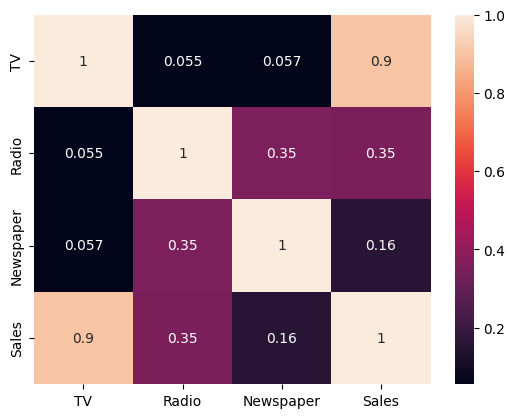

In [91]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Newspaper', ylabel='Sales'>

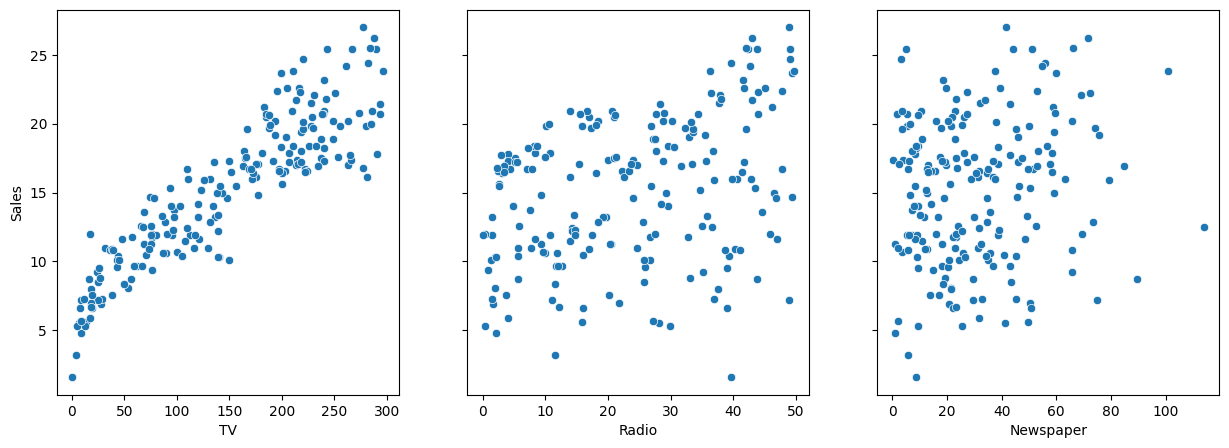

In [92]:
fig, axs =plt.subplots(1,3, figsize=(15,5), sharey=True)
sns.scatterplot(data=df, x='TV', y='Sales', ax=axs[0])
sns.scatterplot(data=df, x='Radio', y='Sales',ax=axs[1])
sns.scatterplot(data=df, x='Newspaper', y='Sales', ax=axs[2])

<Axes: ylabel='Newspaper'>

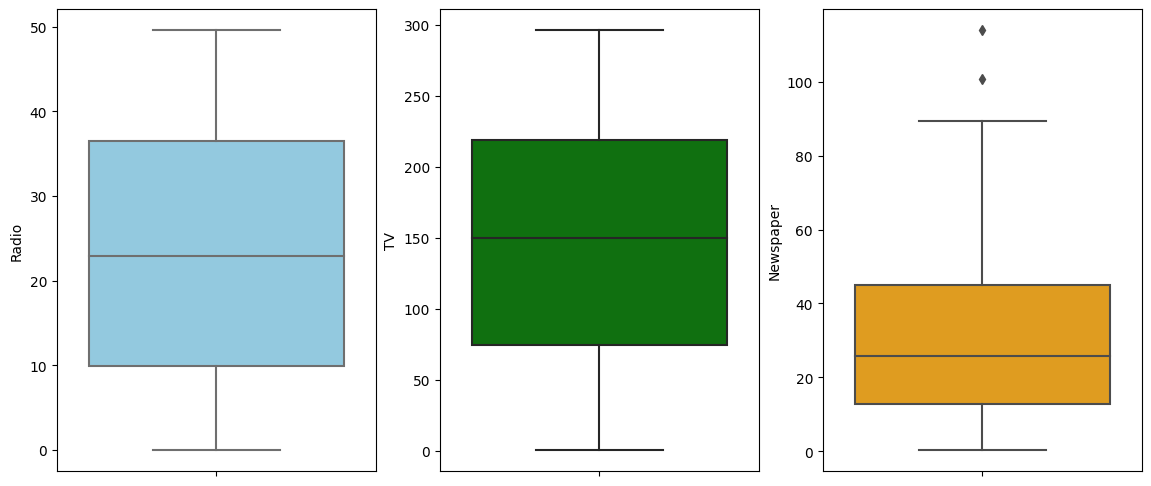

In [93]:
fig, ax = plt.subplots(1,3, figsize=(14, 6))
sns.boxplot(y='Radio', data=df, ax=ax[0], color='skyblue')
sns.boxplot(y='TV',data=df, ax=ax[1], color='green')
sns.boxplot(y='Newspaper', data=df, ax=ax[2], color='orange')

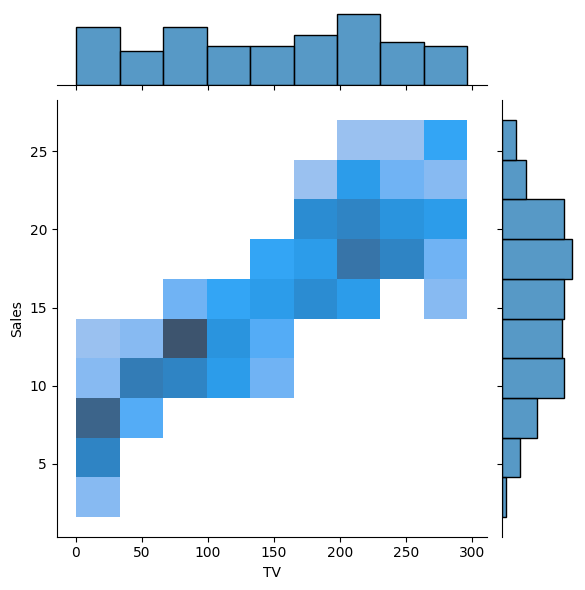

In [94]:
sns.jointplot(data=df, x='TV', y='Sales', kind="hist")

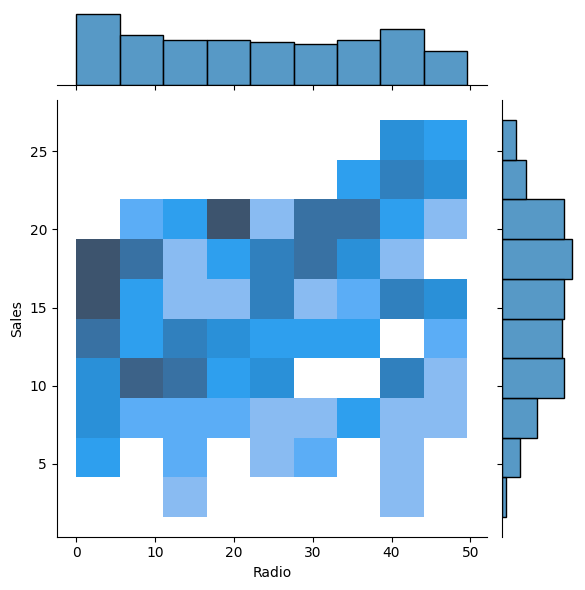

In [95]:
sns.jointplot(data=df, x='Radio', y='Sales', kind="hist")

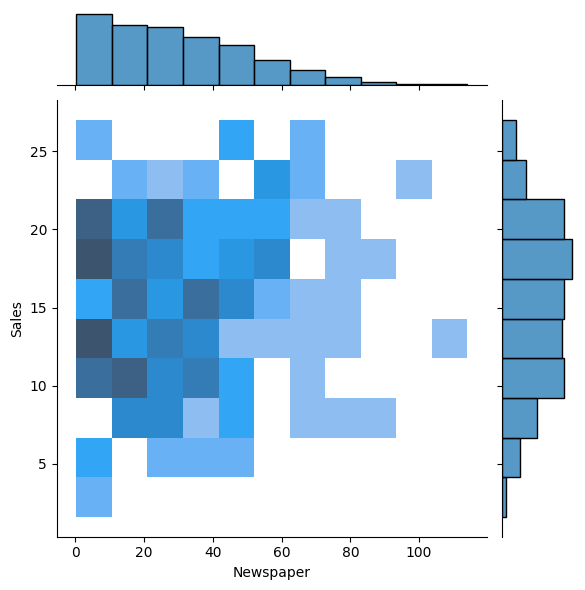

In [96]:
sns.jointplot(data=df, x='Newspaper', y='Sales', kind="hist")

##Machine Learning

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score, r2_score, mean_absolute_error

In [98]:
X=df.drop(['Sales'], axis=1)
y=df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [99]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled[0:5,:])

[[-1.18790645  0.17894564  0.26484154]
 [-1.40133173  0.11187097  0.66568278]
 [-1.24837695  1.09116119 -0.86924589]
 [ 0.73173533  1.41311962 -0.49284618]
 [-0.63537213 -0.94790885  0.29417138]]


In [100]:
models={
    "LinearRegression": LinearRegression(),
    "DecisionTreeClassifier":DecisionTreeRegressor(),
    "RandomForestClassifier":RandomForestRegressor()
}
models_pred={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)
  models_pred[name]=y_pred
  model_r2_score=r2_score(y_test, y_pred)
  model_MSE=mean_absolute_error(y_test, y_pred)
  print(f'{name} accuracy: {round(model_r2_score,2)*100} %')
  print(f'Mean Absolute Error of {name} model :{model_MSE}\n')



LinearRegression accuracy: 90.0 %
Mean Absolute Error of LinearRegression model :1.3547469207230398

DecisionTreeClassifier accuracy: 90.0 %
Mean Absolute Error of DecisionTreeClassifier model :1.1833333333333333

RandomForestClassifier accuracy: 93.0 %
Mean Absolute Error of RandomForestClassifier model :1.0411333333333346

